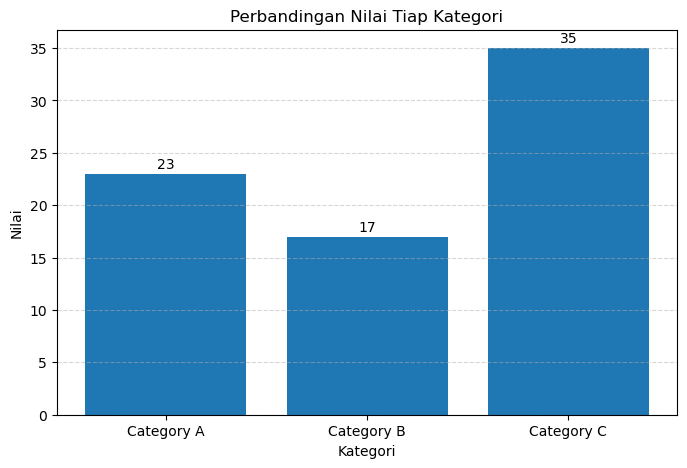

In [1]:
#EXE 1
import matplotlib.pyplot as plt

categories = ['Category A', 'Category B', 'Category C']
values = [23, 17, 35]

plt.figure(figsize=(8, 5))
bars = plt.bar(categories, values)

for bar in bars:
    tinggi = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, tinggi + 0.5,
             str(tinggi),
             ha='center')

plt.xlabel('Kategori')
plt.ylabel('Nilai')
plt.title('Perbandingan Nilai Tiap Kategori')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [2]:
#EXE 2
import pandas as pd

data = {
    'Product': ['Laptop', 'Laptop', 'Desktop', 'Tablet', 'Tablet'],
    'Category': ['Electronics', 'electronics', 'ELECTRONICS', 'Gadgets', 'gadgets']
}

df = pd.DataFrame(data)
df['Category'] = df['Category'].str.strip().str.lower().str.capitalize()

print("Data setelah kategori distandardisasi:\n")
print(df)

Data setelah kategori distandardisasi:

   Product     Category
0   Laptop  Electronics
1   Laptop  Electronics
2  Desktop  Electronics
3   Tablet      Gadgets
4   Tablet      Gadgets


In [4]:
##Load a dataset of your choice and identify missing values.
import pandas as pd

df = pd.read_csv("/home/zurich/Downloads/train.csv")

print("Jumlah missing value tiap kolom:")
print(df.isnull().sum())
print()

Jumlah missing value tiap kolom:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



In [5]:
#Implement data transformations to normalize numerical columns.
kolom_numerik = df.select_dtypes(include=["int64", "float64"]).columns

for kolom in kolom_numerik:
    nilai_min = df[kolom].min()
    nilai_max = df[kolom].max()

    if nilai_max != nilai_min:
        df[kolom + "_normal"] = (df[kolom] - nilai_min) / (nilai_max - nilai_min)
    else:
        df[kolom + "_normal"] = df[kolom]

print("Contoh hasil normalisasi:")
print(df[[kolom + "_normal" for kolom in kolom_numerik]].head())
print()

Contoh hasil normalisasi:
   PassengerId_normal  Survived_normal  Pclass_normal  Age_normal  \
0            0.000000              0.0            1.0    0.271174   
1            0.001124              1.0            0.0    0.472229   
2            0.002247              1.0            1.0    0.321438   
3            0.003371              1.0            0.0    0.434531   
4            0.004494              0.0            1.0    0.434531   

   SibSp_normal  Parch_normal  Fare_normal  
0         0.125           0.0     0.014151  
1         0.125           0.0     0.139136  
2         0.000           0.0     0.015469  
3         0.125           0.0     0.103644  
4         0.000           0.0     0.015713  



In [6]:
#Standardize categorical columns and remove duplicates.
kolom_kategori = df.select_dtypes(include=["object"]).columns

for kolom in kolom_kategori:
    dummy = pd.get_dummies(df[kolom], prefix=kolom)
    df = pd.concat([df.drop(columns=[kolom]), dummy], axis=1)

print("Contoh hasil encoding kategori:")
print(df.head())
print()
df = df.drop_duplicates()
print("Jumlah data setelah menghapus duplikasi:", len(df))

Contoh hasil encoding kategori:
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  \
0            1         0       3  22.0      1      0   7.2500   
1            2         1       1  38.0      1      0  71.2833   
2            3         1       3  26.0      0      0   7.9250   
3            4         1       1  35.0      1      0  53.1000   
4            5         0       3  35.0      0      0   8.0500   

   PassengerId_normal  Survived_normal  Pclass_normal  ...  Cabin_F G73  \
0            0.000000              0.0            1.0  ...        False   
1            0.001124              1.0            0.0  ...        False   
2            0.002247              1.0            1.0  ...        False   
3            0.003371              1.0            0.0  ...        False   
4            0.004494              0.0            1.0  ...        False   

   Cabin_F2  Cabin_F33  Cabin_F38  Cabin_F4  Cabin_G6  Cabin_T  Embarked_C  \
0     False      False      False     False     

In [7]:
# BAGIAN 1 — IMPORT LIBRARY & LOAD DATASET
# Memanggil library pandas dan matplotlib, membaca file Titanic (train.csv) sebagai DataFrame.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/home/zurich/Downloads/train.csv")

print("5 Data Teratas:")
print(df.head())

5 Data Teratas:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   N

In [8]:
# BAGIAN 2 — CEK MISSING VALUE
# Melihat jumlah nilai kosong di tiap kolom. Proses data cleaning.
print("\nJumlah Missing Value per Kolom:")
print(df.isnull().sum())


Jumlah Missing Value per Kolom:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
# BAGIAN 3 — MENANGANI MISSING VALUE

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print("\nMissing value setelah diperbaiki:")
print(df.isnull().sum())


Missing value setelah diperbaiki:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [10]:
# BAGIAN 4 — NORMALISASI DATA NUMERIK
# Normalisasi dilakukan untuk membuat skala data menjadi 0–1. Rumus: (x - min) / (max - min)

kolom_numerik = ['Age', 'Fare', 'SibSp', 'Parch']
for kolom in kolom_numerik:
    df[kolom + "_norm"] = (df[kolom] - df[kolom].min()) / (df[kolom].max() - df[kolom].min())
print("\nContoh hasil normalisasi:")
print(df[[col + "_norm" for col in kolom_numerik]].head())


Contoh hasil normalisasi:
   Age_norm  Fare_norm  SibSp_norm  Parch_norm
0  0.271174   0.014151       0.125         0.0
1  0.472229   0.139136       0.125         0.0
2  0.321438   0.015469       0.000         0.0
3  0.434531   0.103644       0.125         0.0
4  0.434531   0.015713       0.000         0.0


In [11]:
# BAGIAN 5 — STANDARISASI KOLOM KATEGORIK (Diseragamkan)

kolom_kategorik = ['Sex', 'Embarked']
for kolom in kolom_kategorik:
    df[kolom] = df[kolom].str.capitalize()

print("\nContoh kolom kategorik setelah distandarisasi:")
print(df[kolom_kategorik].head())


Contoh kolom kategorik setelah distandarisasi:
      Sex Embarked
0    Male        S
1  Female        C
2  Female        S
3  Female        S
4    Male        S


In [12]:
#BAGIAN 6 — MENGHAPUS DATA DUPLIKAT

jumlah_sebelum = len(df)
df = df.drop_duplicates()
jumlah_sesudah = len(df)
print(f"\nJumlah data sebelum: {jumlah_sebelum}")
print(f"Jumlah data sesudah hapus duplikat: {jumlah_sesudah}")


Jumlah data sebelum: 891
Jumlah data sesudah hapus duplikat: 891


In [13]:
# BAGIAN 7 — MENANGANI OUTLIER (Contoh: kolom Fare)

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR
df = df[(df['Fare'] >= batas_bawah) & (df['Fare'] <= batas_atas)]
print("\nOutlier kolom Fare sudah ditangani.")


Outlier kolom Fare sudah ditangani.
